In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from numpy import linalg as LA

import math
from scipy.integrate import quad
from scipy.integrate import nquad


Nazir paper 

$ H_S= \frac{\omega}{2} \sigma_z + \frac{\Delta}{2} \sigma_x $

$ H_B= \sum_{k} \omega_k a_k ^{\dagger} a_k $

$ H_I= \sigma_z \otimes \sum t_{k}\left(a_{k}+a_{k}^{\dagger}\right)$




We will use this example for spectral densury 

$J^{(0)}(\omega)=2 \pi \sum_{k}\left|t_{k}\right|^{2} \delta\left(\omega-\omega_{k}\right)=\alpha \frac{\omega_{c} \omega}{\omega^{2}+\omega_{c}^{2}}$



with this paremeters:

$\omega=0.5 \Delta, \omega_{c}=0.05 \Delta, \beta \Delta=0.95, \pi \alpha=0.1 \Delta$

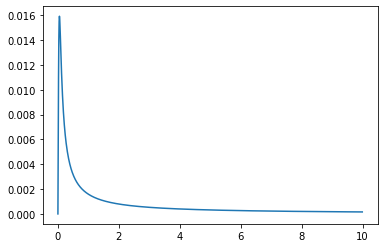

In [2]:
Delta=1.0
omega=0.5*Delta
wc = 0.05*Delta                # Cutoff frequency.
alpha = 0.1*Delta/np.pi        # Coupling strength.
beta=0.95/Delta



def J(w):
    return alpha* (wc*w) /(w**2+wc**2)

#print (J(0.0))
vecfunc = np.vectorize(J)
w = np.arange(0.0, 10.0, 0.01)
T = vecfunc(w)
plt.plot (w, T)
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if __name__ == '__main__':


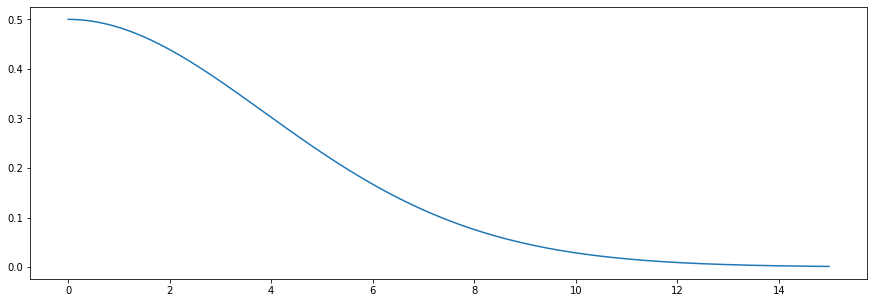

In [14]:
def integrand(w, t):
    return J(w)* (np.sin(w*t/2))**2 / (w**2)  / np.tanh (beta*w /2 )

options={'limit':100}



def expint(t):
    return quad(integrand, 0, np.inf, args=(t),  limit=100)[0]

rho_01_init=0.5

def rho_01(t):
    return np.exp(-4.0/np.pi * expint(t) ) * rho_01_init

vecfunc = np.vectorize(rho_01)
t1 = np.arange(0.0, 15.0, 0.01)
T1 = vecfunc(t1)
plt.plot (t1, T1)
plt.show()



Now we apply the reaccion coodinate mapping :

$  H_0= \frac{\omega}{2} \sigma_z + \frac{\Delta}{2} \sigma_x +   \Omega_0 b ^{\dagger} b +g \sigma_z  \left( b + b ^{\dagger} \right) + \frac{g^2}{\Omega} \sigma_z^2 + \Omega \Delta_{RC} \left( b + b ^{\dagger} \right)^2$

$   H_B= \sum_{k} \Omega_k b_k ^{\dagger} b_k $

$   H_I= \left( b + b ^{\dagger} \right) \sum_k h_k \left( b_k + b_k ^{\dagger} \right)$





Since we are using a spectral density of the Drude-Lorentz form, the integral involving the calculation of $\Omega$ and $g$ diverges, the we use an auxiliary function, that is approximately equal to the spectral density \cite{thoss2001self} (Section 3): 

$ J^{(0)}(\omega)=\frac{\alpha \omega_{c} \omega}{\omega_{c}^{2}+\frac{\omega^{4} \omega_{c}^{2}}{\Omega^{4}}+\omega^{2}}$

 in the limit $\omega_c << \Omega$. If we use this auxiliary spectral density we find that the new spectral density is given by: 
 
$ J^{(1)}(\omega)=\gamma \omega e^{ \left(- \frac{\omega}{\Lambda}   \right)} $

 
 in the limit $\Lambda \rightarrow \infty$. This put some restriction, and allow as to calculate the new parameters as: 
 
   $  \alpha= \frac{4 g^2}{\Omega}$


   $ \omega_c = \frac{\Omega}{\gamma}$ 


where we have the freedom to chose $\gamma$, such $\gamma^2 >>1 $ and $\gamma >> \Omega$. We chose as :

$\gamma = \frac{\Delta E}{2  \pi  \omega_c} $ 

where $\Delta E$ is the energy spliting of the qubit.





Then the energy of the RC and the coupling strength become:

$\Omega_{0}=   \gamma \omega_c , \quad g^{2}= \frac{  \Omega  \alpha} { 4}
$


The mapping transformation can be computed explicitly, where the transformed spectral density becomes ohmic:

$ J^{(1)}(\omega)=\gamma \omega $


And the renormalization energy as $\Delta_{RC}$: 

$\Omega_{0} \cdot \Delta_{RC} \equiv \sum_{k} \frac{h_{k}^{2}}{\Omega_{k}}=\frac{1}{2 \pi} \int_{0}^{\infty} \frac{J^{(1)}(\omega)}{\omega} d \omega$

0.17794072046611478 0.03762990831771983 1.5915494309189535
0.0316629 0.0014160100000000003


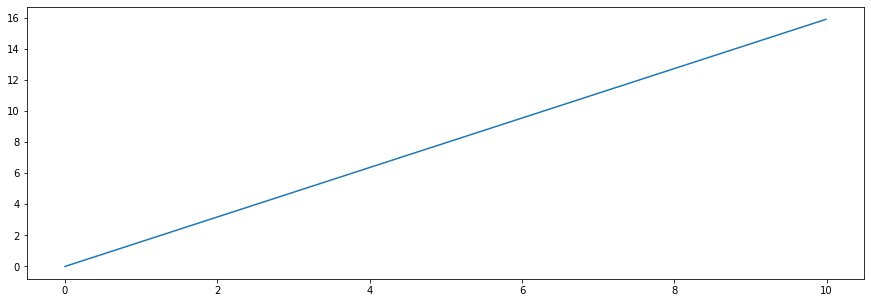

0.05 0.17794072046611478 0.03762990831771983 0.0


In [15]:
##We build the supersystem Hamiltonian with N_RC number of modes for the RC

N_RC = 40 # number of basis states to consider
b = destroy(N_RC)

Hsys = omega/2  * sigmaz()


dot_energy, dot_state = Hsys.eigenstates()
deltaE = dot_energy[1] - dot_energy[0]

gamma1 = deltaE / (2 * np.pi * wc)
#print(gamma1)
#gamma1 = deltaE /  wc
#print(gamma1)
#Omega_Rc =  gamma1 * wc  # reaction coordinate frequency
#g = np.sqrt( Omega_Rc * alpha / 4.0)  # reaction coordinate coupling

Omega_Rc = np.sqrt(0.0316629) 
g = np.sqrt(0.00141601)

#gamma1 = deltaE / (2 * np.pi * wc)
#Omega_Rc =  2 * np.pi* gamma1 * wc  # reaction coordinate frequency
#g = np.sqrt( np.pi* Omega_Rc * alpha / 2.0)  # reaction coordinate coupling

print(Omega_Rc, g, gamma1)
print(Omega_Rc**2, g**2)

def J_1(w):
    return gamma1*w

vecfunc = np.vectorize(J_1)
w = np.arange(0.0, 10.0, 0.01)
T = vecfunc(w)
plt.plot (w, T)
plt.show()

def integrand(w):
    return  J_1(w)/w

Delta_Rc =0.00 # (1/(2*np.pi*Omega_Rc))* quad(integrand, 0, np.inf)[0]

print(wc, Omega_Rc,g,Delta_Rc)

H0= omega/2 *tensor(sigmaz(), identity(N_RC) )   + Omega_Rc *tensor(identity(2) , b.dag() * b )  + g* tensor(sigmaz(),  b.dag() + b ) + Omega_Rc*Delta_Rc *tensor(identity(2) , (b.dag() + b)*(b.dag() + b) )  

In order to aplly the master equation we need to preapre the initial state as: 

$\rho_{0}=\rho_{S}^{0} \otimes \frac{e^{-\beta \Omega\left[b^{\dagger} b+\Delta_{Rc}\left(b+b^{\dagger}\right)^{2}\right]}}{Z_{R C}}$

In [16]:
##Rc inicial state Thermal  
H1 = b.dag() * b
H2 = Delta_Rc*(b.dag()+ b)*(b.dag()+ b)  ##Auxliar Hamiltonians
#H_Rc= -beta*Omega_Rc*(H1+H2)
H_Rc= -beta*Omega_Rc*H1 #wihtout the Delta _RC term
Exp= H_Rc.expm()
Z_Rc=Exp.tr()
rho_Rc_init=Exp/Z_Rc

#print(rho_Rc_init)

#Sistem inital state
psi0 = (1/np.sqrt(2.)) * (basis(2, 0) + basis(2, 1) )
#psi0 =  basis(2, 0) 

##Spin Inicial state 
rho_Spin= psi0*psi0.dag()
#print(rho_Spin)

###Tensor producto of the initial state
rho_init=tensor(rho_Spin,rho_Rc_init) 

print(rho_init.ptrace(0))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


The evolutions is given by the master equation (in the interaction picture):

$\dot{\boldsymbol{\rho}}_{0}(t)=\gamma' \left(b \boldsymbol{\rho}_{0}(t) b^{\dagger}-\frac{1}{2}\left\{b^{\dagger} b, \boldsymbol{\rho}_{0}(t)\right\}\right)+\bar{\gamma}' \left(b^{\dagger} \boldsymbol{\rho}_{0}(t) b-\frac{1}{2}\left\{b b^{\dagger}, \boldsymbol{\rho}_{0}(t)\right\}\right)-\mathrm{i}\left[\frac{\sigma}{2} b^{\dagger} b+\frac{\bar{\sigma}}{2} b b^{\dagger}, \boldsymbol{\rho}_{0}(t)\right]$


where $\gamma'=J(\Omega)\left[1+n_{B}(\Omega)\right]$ , $ \bar{\gamma}' = J(\Omega) n_{B}(\Omega)$ and $n_{B}(\omega)=\left[e^{\beta \omega}-1\right]^{-1}$

and 
$\sigma =\sigma(\Omega)=\frac{\mathrm{i}}{\pi} \mathcal{P} \int_{-\infty}^{+\infty} \frac{\gamma(\Omega')}{\Omega-\Omega'} d \Omega'$

In [17]:
def nb(w):
    return 1/(np.exp(beta*w)-1)

def gamma_prime(w):
     return J_1(w)*(1+nb(w))
    
print(gamma_prime(0.000001))

gamma_prime_n= J_1(Omega_Rc)*(1+nb(Omega_Rc))
gamma_bar_prime_n= J_1(Omega_Rc)*nb(Omega_Rc)

print(gamma_prime_n,gamma_bar_prime_n , gamma_prime(Omega_Rc))

1.6753159863145006
1.820903469315841 1.5377020169206874 1.820903469315841


In [9]:
#from sympy import oo
#from sympy.integrals.integrals import Integral
#from sympy.abc import x

#Calculate the lamb Shift 
#Integral(gamma_prime(x)/(Omega_Rc-x), (x, -oo, oo)).principal_value()

In [18]:
L1=tensor(identity(2) ,  b )
L2=tensor(identity(2) , b.dag()  )
L=[np.sqrt(gamma_prime_n) * L1, np.sqrt(gamma_bar_prime_n)*L2 ]

t0 = 0.0
tf = 15.0
time_steps = 1000

## Time range
t = np.linspace(0, tf, time_steps)

We find the the population as:

$\left|\rho_{00}\right|=\mid \frac{1}{2} \operatorname{Tr}\left\{\left(\sigma^{z}+ 1 \right) \rho(t)\right\}$

In [19]:






result = mesolve(0*H0, rho_init, t, L)


states_IP=result.states
exp_result=[0 for i in range(len(states_IP))]


trace=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    exp_result[i]=  (-1j*H0*t[i]).expm()* states_IP[i]*  (1j*H0*t[i]).expm()
    #trace[i]=  states_IP[i].ptrace(0)
    trace[i]=  exp_result[i].ptrace(0)

print(trace[0])    




p00=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    p00[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace[i]))

print(p00[0])  

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]
0.4999999999999997


Now we evolve with the following equation in order to compare: 

$\begin{aligned} \dot{\rho}=-& \mathrm{i}\left[H_{S}^{\prime}, \rho\right]-\int_{0}^{\infty} C(+\tau)\left[\left(b+b^{\dagger}\right), e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+\mathrm{i} H_{S}^{\prime} \tau} \rho(t)\right] d \tau \\ &-\int_{0}^{\infty} C(-\tau)\left[\rho(t) e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+i H_{S}^{\prime} \tau},\left(b+b^{\dagger}\right)\right] d \tau \end{aligned}$

where we need to find the supersystem Hamitionial states $H_{S}^{\prime}\left|a^{\prime}\right\rangle=E_{a}^{\prime}\left|a^{\prime}\right\rangle$, we can find:  

$\int_{0}^{\infty} C(\tau) e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+\mathrm{i} H_{S}^{\prime} \tau} d \tau=\sum_{a b}\left\langle a^{\prime}\left|\left(b+b^{\dagger}\right)\right| b^{\prime}\right\rangle \int_{0}^{\infty} C(\tau) e^{-\mathrm{i}\left(E_{a}^{\prime}-E_{b}^{\prime}\right) \tau} d \tau\left|a^{\prime}\right\rangle\left\langle b^{\prime}\right|$

where: 

$\int_{0}^{\infty} C(\tau) e^{+\mathrm{i}\left(E_{b}^{\prime}-E_{a}^{\prime}\right) \tau} d \tau =\frac{\gamma\left(E_{b}^{\prime}-E_{a}^{\prime}\right)}{2}+\frac{\mathrm{i}}{2 \pi} \mathcal{P} \int \frac{\gamma(\omega)}{E_{b}^{\prime}-E_{a}^{\prime}-\omega} d \omega$ 

where we will negecled the principal value term (lamb Shift) and $\gamma(\omega)=J(\omega)\left[1+n_{B}(\omega)\right]$

In [9]:
def nb(w):
    return 1/(np.exp(beta*w)-1)

def gamma(w):
    if (w==0):
        return 3.74611
    else:  
        return J_1(w)*(1+nb(w))

  
print(gamma(0))

all_energy, all_state = H0.eigenstates(sparse=sparse)

Nmax=N_RC*2
L=0
Limb_op1=0
Limb_op2=0
Apre = spre((b + b.dag()))
Apost = spost(b + b.dag())
for j in range(Nmax):
    for k in range(Nmax):
        A = (b + b.dag()).matrix_element(all_state[j].dag(), all_state[k])
        delE = (all_energy[j] - all_energy[k])
        X1=gamma(delE)/2
        X2=gamma(-delE)/2
        Limb_op1 = Limb_op1 + A*X1*all_state[j] * all_state[k].dag() 
        Limb_op2 = Limb_op2 + A*X2*all_state[j] * all_state[k].dag()
B=tensor(identity(2),b + b.dag())
print(B*Limb_op1)



L= -spre(B* Limb_op1)+ sprepost(Limb_op1, B)-  spost(Limb_op2*B) +  sprepost( B, Limb_op2)



output = mesolve(H0, rho_init, t, [L])

3.74611
Quantum object: dims = [[2, 20], [2, 20]], shape = (40, 40), type = oper, isherm = False
Qobj data =
[[ 2.10494325e+00+0.00000000e+00j  1.60547408e-03+0.00000000e+00j
   2.52903503e+00+0.00000000e+00j ... -8.16920169e-12+0.00000000e+00j
   4.32933883e-12+0.00000000e+00j  1.45360314e-12+0.00000000e+00j]
 [ 1.60848116e-03+0.00000000e+00j  5.99816774e+00+0.00000000e+00j
   1.95342982e-03+0.00000000e+00j ...  1.24689959e-11+0.00000000e+00j
   2.94189712e-12+0.00000000e+00j -7.19895120e-12+0.00000000e+00j]
 [ 2.97681660e+00+0.00000000e+00j  1.95767294e-03+0.00000000e+00j
   9.89132593e+00+0.00000000e+00j ... -2.53181720e-11+0.00000000e+00j
   1.80535615e-12+0.00000000e+00j  2.05570527e-12+0.00000000e+00j]
 ...
 [-2.99395532e-11+0.00000000e+00j -2.01343086e-11+0.00000000e+00j
  -4.68871373e-12+0.00000000e+00j ... -2.40310617e+00+0.00000000e+00j
   1.68737694e-02+0.00000000e+00j -1.27106323e+00+0.00000000e+00j]
 [-3.54905033e-11+0.00000000e+00j -1.13009588e-11-7.25474720e-12j
  -2.932

C:\Users\Luis Herrera\anaconda3\envs\qutip\lib\site-packages\scipy\integrate\_ode.py:1012: UserWarning: zvode: Excess accuracy requested. (Tolerances too small.)
  self.messages.get(istate, unexpected_istate_msg)))


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [ ]:
states_IP_2=output.states

exp_result_2=[0 for i in range(len(states_IP_2))]
trace_2=[0 for i in range(len(states_IP_2))]
for i in range(len(states_IP_2)):
    trace_2[i]=  states_IP_2[i].ptrace(0)

print(trace_2[0])    


p00_2=[0 for i in range(len(states_IP_2))]
for i in range(len(states_IP_2)):
    p00_2[i]=abs(expect(0.5*(sigmaz()+identity(2)),trace_2[i]))
    
print(p00_2[0])

In [39]:
####HEOM

from qutip.nonmarkov.heom import HSolverDL

Nk = 2 # number of exponentials in approximation of the the spectral density
Ncut = 30 # cut off parameter for the bath
Q = sigmaz() # coupling operator
lam= alpha /2.0
temperature=1.0/beta



hsolver = HSolverDL(Hsys, Q, lam, temperature, Ncut, Nk, wc )
result = hsolver.run(rho_Spin, t)





#P01exp = expect(result.states, 0.5*(sigmax()+1j*sigmay()))
P01exp= abs(expect(0.5*(sigmax()+1j*sigmay()),result.states))

In [23]:
print(result.states)

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]], Quantum o

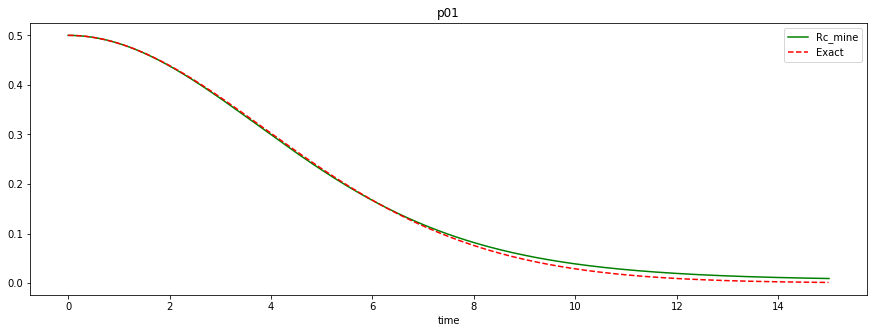

In [20]:
plt.title("p01")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(t,p00,"-",label='Rc_mine', color = "g")
#plt.plot(t,p00_2,"-",label='Rc_Gernot', color = "r")
#plt.plot(t,P00exp,"-",label='HEOM', color = "b")
plt.plot (t1 , T1,"--",label='Exact', color = "r")
plt.xlabel("time")
plt.legend()
plt.show()